# Регрессия

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
df1 = pd.read_csv(r'C:\Users\Zver\Desktop\machine_learning\data\winequality-red.csv', sep=';')
df2 = pd.read_csv(r'C:\Users\Zver\Desktop\machine_learning\data\winequality-white.csv', sep=';')
data = pd.concat([df1,df2], ignore_index=True)
data.to_csv('winequality.csv', index=False)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Предикторы
- fixed acidity - фиксированная кислотность (винная кислота)
- volatile acidity - летучая кислотность (уксусная кислота)
- citric acid - лимонная кислота
- residual sugar - остаточный сахар
- chlorides - хлориды (соленость)
- free sulfur dioxide - свободный диоксид серы (консервант)
- total sulfur dioxide - общий диоксид серы
- density - плотность
- pH - водородный показатель
- sulphates - сульфаты (консервант)
- alcohol - алкоголь (содержание этилового спиртаааа)
- quality - КАЧЕСТВО ВИНА, целевая переменная. Качество вина определяется по 10-ой шкале

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [34]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [35]:
data.nunique()

fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
dtype: int64

In [36]:
data.duplicated().sum()

1179

In [37]:
data=data.drop_duplicates()

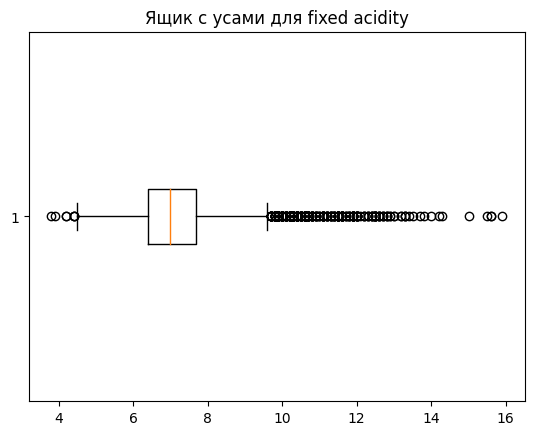

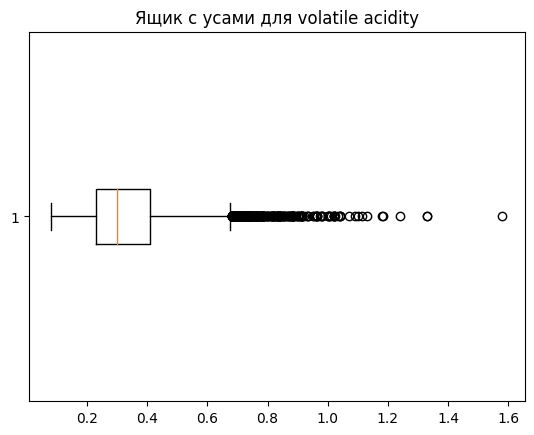

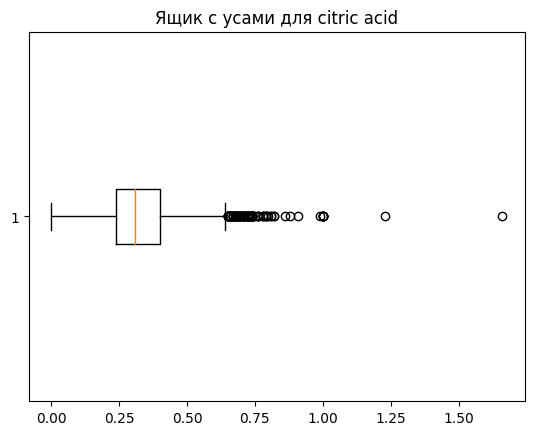

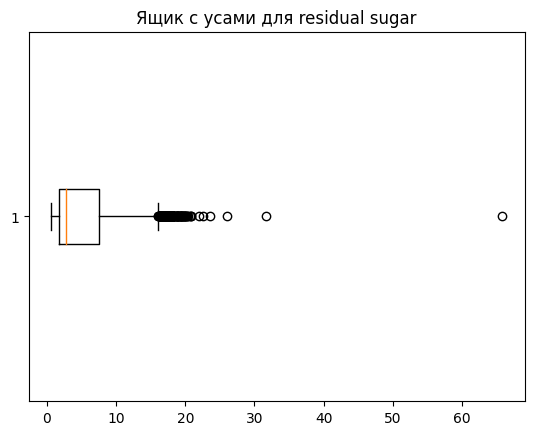

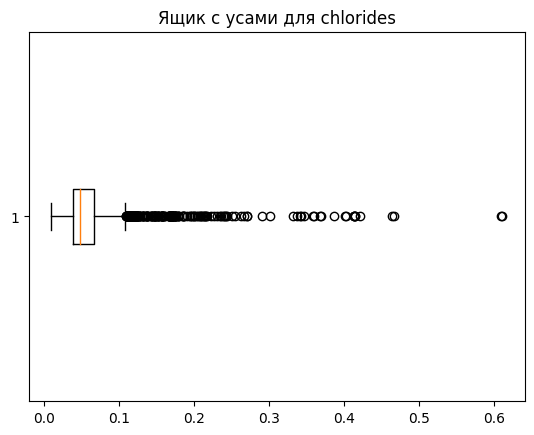

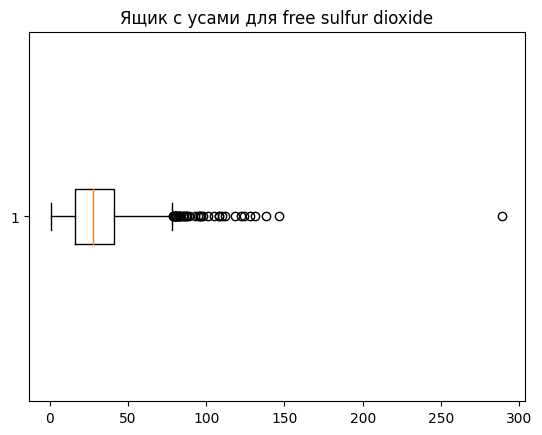

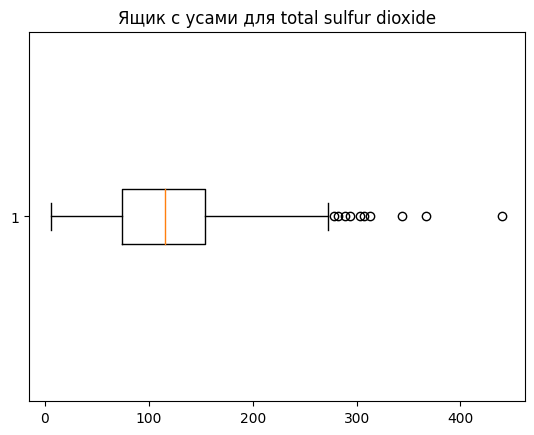

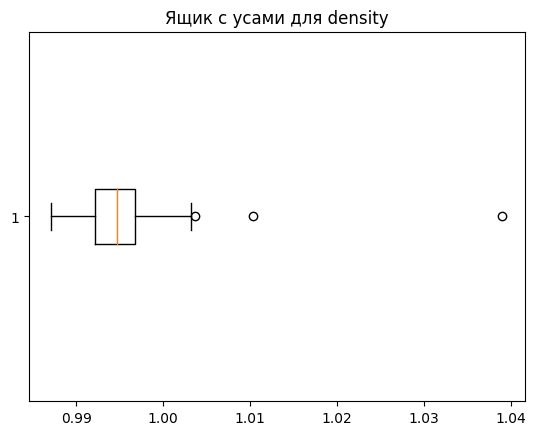

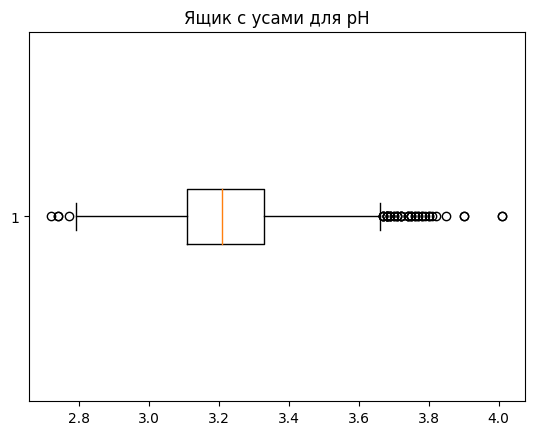

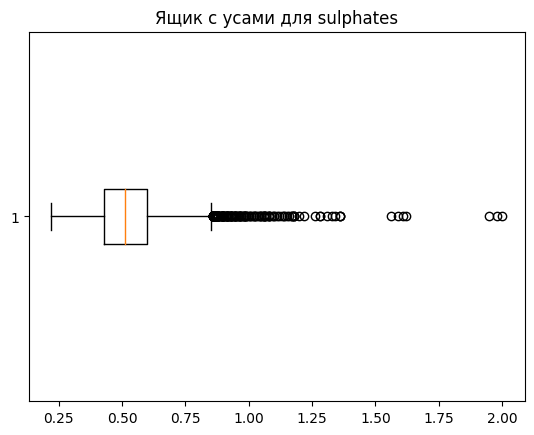

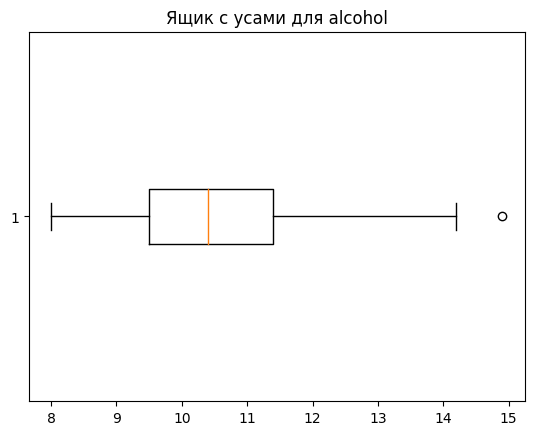

In [38]:
columns = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
for column in columns:
    plt.figure()
    plt.title(f'Ящик с усами для {column}')
    plt.boxplot(data[column], vert=False)
    plt.show()

In [ ]:
# Убираем выбросы через верхние и нижние пределы, IQR
outlier = data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
Q1 = outlier.quantile(0.2)
Q3 = outlier.quantile(0.8)
data_filtered = outlier[~((outlier < (Q1 - 1.5 * (Q3-Q1))) |(outlier > (Q3 + 1.5 * (Q3-Q1)))).any(axis=1)]
# Датафрейм для "чистых" данных
index_list = list(data_filtered.index.values)
data_filtered = data[data.index.isin(index_list)]

In [39]:
data_filtered.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4766.000000,4766.000000,4766.000000,4766.000000,4766.000000,4766.000000,4766.000000,4766.000000,4766.000000,4766.000000,4766.000000,4766.000000
mean,7.049381,0.327893,0.306576,5.084757,0.050757,30.380927,116.941460,0.994258,3.227023,0.517958,10.584969,5.828158
std,1.026542,0.145829,0.126977,4.322877,0.019738,16.449558,54.259216,0.002784,0.155140,0.123818,1.189327,0.869232
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.037000,17.000000,83.000000,0.992000,3.120000,0.430000,9.550000,5.000000
50%,6.900000,0.290000,0.310000,2.800000,0.046000,29.000000,118.000000,0.994380,3.220000,0.500000,10.400000,6.000000
75%,7.600000,0.390000,0.380000,7.700000,0.059000,41.000000,154.000000,0.996417,3.330000,0.590000,11.400000,6.000000
max,10.500000,0.805000,0.710000,18.800000,0.130000,89.000000,303.000000,1.002600,3.760000,0.940000,14.200000,9.000000


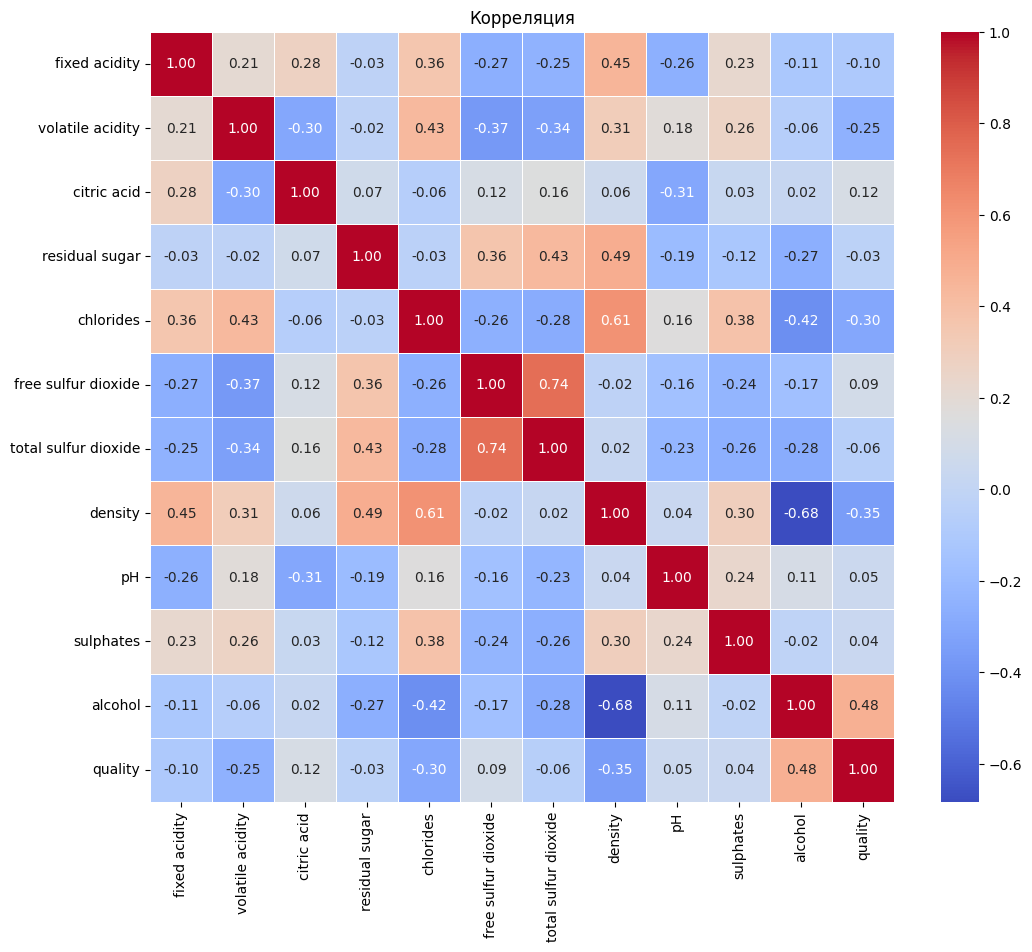

In [40]:
plt.figure(figsize=(12, 10))
corr = data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol', 'quality']].corr(method='spearman')
sns.heatmap(
    corr, 
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    fmt=".2f"
)
plt.title('Корреляция')
plt.show()

In [41]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch import nn
import torch.nn.functional as F

In [42]:
label = 'quality'
features = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
X, y = data_filtered[features].values, data_filtered[label].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3812, 11), (954, 11), (3812,), (954,))

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train).unsqueeze(1)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test).unsqueeze(1)

In [44]:
class WineQualityDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels
        
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

train_dataset = WineQualityDataset(X_train_tensor, y_train_tensor)
test_dataset = WineQualityDataset(X_test_tensor, y_test_tensor)

In [45]:
train_loader = DataLoader(
    train_dataset, 
    batch_size=32, 
    shuffle=True,
    num_workers=0
)

test_loader = DataLoader(
    test_dataset, 
    batch_size=32, 
    shuffle=False,
    num_workers=0
)

In [46]:
print(f"Train dataset: {len(train_dataset)}")
print(f"Test dataset: {len(test_dataset)}")
print(f"Train loader batches: {len(train_loader)}")
print(f"Test loader batches: {len(test_loader)}")

Train dataset: 3812
Test dataset: 954
Train loader batches: 120
Test loader batches: 30


In [47]:
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.layer1 = nn.Linear(input_size, 128)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.1)
        
        self.layer2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.1)
        
        self.layer3 = nn.Linear(64, 32)
        self.relu3 = nn.ReLU()
        
        self.output = nn.Linear(32, 1)

        self.net = nn.Sequential(
            
        )
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        
        x = self.layer3(x)
        x = self.relu3(x)
        
        x = self.output(x)
        return x

In [54]:
input_size = X_train_tensor.shape[1]
model = RegressionModel(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

train_losses = []
val_losses = []

epochs = 100

for epoch in range(epochs):
    model.train()
    epoch_train_loss = 0
    batch_count = 0
    
    for x_b, y_b in train_loader:
        outputs = model(x_b)
        loss_value = criterion(outputs, y_b)
        loss_value.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        epoch_train_loss += loss_value.item()
        batch_count += 1
    
    avg_train_loss = epoch_train_loss / batch_count
    train_losses.append(avg_train_loss)
    
    model.eval()
    epoch_val_loss = 0
    batch_count_val = 0
    
    with torch.no_grad():
        for x_b, y_b in test_loader:
            outputs = model(x_b)
            loss_value = criterion(outputs, y_b)
            epoch_val_loss += loss_value.item()
            batch_count_val += 1
    
    avg_val_loss = epoch_val_loss / batch_count_val
    val_losses.append(avg_val_loss)
    
    print(f'Эпоха {epoch + 1}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')

Эпоха 1, Train Loss: 12.2755, Val Loss: 1.7201
Эпоха 2, Train Loss: 1.6627, Val Loss: 1.2715
Эпоха 3, Train Loss: 1.3500, Val Loss: 1.0571
Эпоха 4, Train Loss: 1.1287, Val Loss: 0.8882
Эпоха 5, Train Loss: 0.9859, Val Loss: 0.7418
Эпоха 6, Train Loss: 0.8739, Val Loss: 0.6658
Эпоха 7, Train Loss: 0.8050, Val Loss: 0.6038
Эпоха 8, Train Loss: 0.7924, Val Loss: 0.5792
Эпоха 9, Train Loss: 0.7400, Val Loss: 0.5541
Эпоха 10, Train Loss: 0.7139, Val Loss: 0.5403
Эпоха 11, Train Loss: 0.7097, Val Loss: 0.5676
Эпоха 12, Train Loss: 0.6858, Val Loss: 0.5639
Эпоха 13, Train Loss: 0.6908, Val Loss: 0.5241
Эпоха 14, Train Loss: 0.6857, Val Loss: 0.6129
Эпоха 15, Train Loss: 0.6879, Val Loss: 0.5247
Эпоха 16, Train Loss: 0.6600, Val Loss: 0.5130
Эпоха 17, Train Loss: 0.6502, Val Loss: 0.5190
Эпоха 18, Train Loss: 0.6433, Val Loss: 0.5083
Эпоха 19, Train Loss: 0.6417, Val Loss: 0.5068
Эпоха 20, Train Loss: 0.6369, Val Loss: 0.5186
Эпоха 21, Train Loss: 0.6123, Val Loss: 0.5162
Эпоха 22, Train Loss:

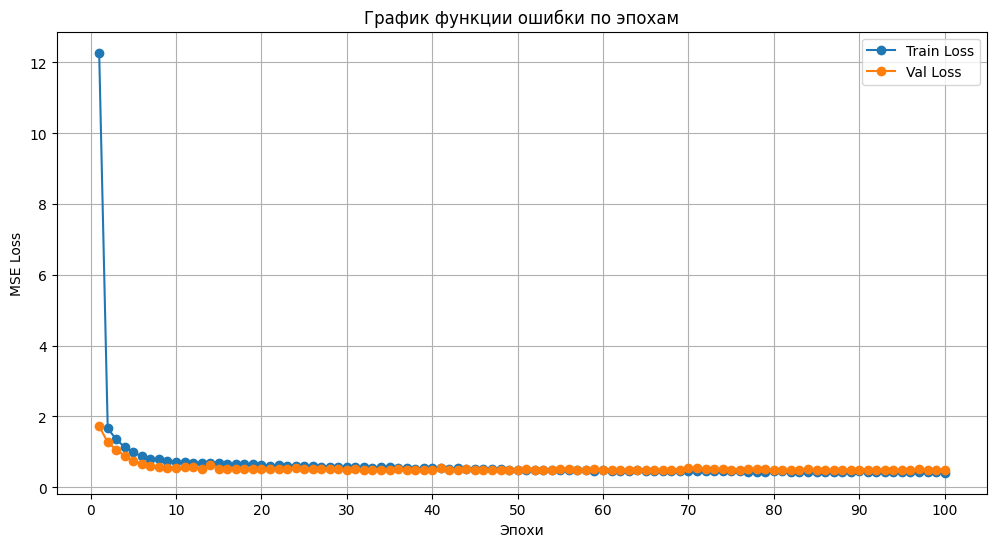

ОЦЕНКА КАЧЕСТВА МОДЕЛИ
MAE (Средняя абсолютная ошибка): 0.5463
MSE (Средняя квадратичная ошибка): 0.5007
RMSE (Среднеквадратичная ошибка): 0.7076
R² (Коэффициент детерминации): 0.3657
MAPE (Средняя абсолютная процентная ошибка): 0.0985

Примеры предсказаний:
Реальное | Предсказанное
-------------------------
    5.00 |         5.88
    6.00 |         6.78
    5.00 |         5.13
    6.00 |         5.65
    6.00 |         6.44
    5.00 |         5.32
    6.00 |         6.21
    6.00 |         6.24
    6.00 |         5.79
    5.00 |         5.34


In [55]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, epochs + 1), val_losses, label='Val Loss', marker='o')
plt.xlabel('Эпохи')
plt.ylabel('MSE Loss')
plt.title('График функции ошибки по эпохам')
plt.legend()
plt.grid(True)
plt.xticks(range(0, epochs + 1, 10))
plt.show()

model.eval()
all_predictions = []
all_targets = []

with torch.no_grad():
    for x_b, y_b in test_loader:
        outputs = model(x_b)
        all_predictions.extend(outputs.numpy())
        all_targets.extend(y_b.numpy())

y_pred = np.array(all_predictions).flatten()
y_true = np.array(all_targets).flatten()

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)

print("ОЦЕНКА КАЧЕСТВА МОДЕЛИ")
print(f"MAE (Средняя абсолютная ошибка): {mae:.4f}")
print(f"MSE (Средняя квадратичная ошибка): {mse:.4f}")
print(f"RMSE (Среднеквадратичная ошибка): {rmse:.4f}")
print(f"R² (Коэффициент детерминации): {r2:.4f}")
print(f"MAPE (Средняя абсолютная процентная ошибка): {mape:.4f}")

print("\nПримеры предсказаний:")
print("Реальное | Предсказанное")
print("-" * 25)
for i in range(min(10, len(y_true))):
    print(f"{y_true[i]:8.2f} | {y_pred[i]:12.2f}")